<a href="https://colab.research.google.com/github/Averkios1/End-to-End-Detection-Using-Yolov5-/blob/main/read_csv_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
!pip install openpyxl pandas numpy matplotlib
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

# Path to the CSV file
file_path = '/content/drive/MyDrive/amari_ue_data_merged_with_attack_number.csv'

data = pd.read_csv(file_path)



# Step 1: Handle missing values using SimpleImputer
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

numerical_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Step 2: Convert categorical variables to numeric using label encoding
columns_to_encode = ['bearer_0_apn', 'bearer_0_ip', 'bearer_1_apn', 'bearer_1_ip', 'ran_plmn']
data[columns_to_encode] = data[columns_to_encode].apply(LabelEncoder().fit_transform)

In [ ]:
##x = data['ul_tx']
#y = x[1:5000]

In [4]:
#filtered_data = data[data['imeisv'] == '8642840401624200']

selected_features = ['imeisv', 'ul_tx']
filtered_data1 = data[selected_features]


print(filtered_data1)

filtered_data2 = filtered_data1[filtered_data1['imeisv'] == 8642840401624200]

print(filtered_data2)


dataframe = pd.DataFrame(filtered_data1)
print("Original DataFrame:")
print(dataframe)

filtered_dataframe = dataframe[filtered_data1['imeisv'] == 8642840401624200]


print(filtered_dataframe)






dataframe_pivot = dataframe.pivot( columns='imeisv', values='ul_tx' ) #& (dataframe['ul_tx'] > 1)
print("\nDataFrame after pivoting:")
print(dataframe_pivot)


sorted_dataframe = dataframe.sort_values(by='imeisv')
print("DataFrame sorted by Age:")
print(sorted_dataframe)

#sorted_dataframe_pivot = sorted_dataframe.pivot( columns='imeisv', values='ul_tx' ) #& (dataframe['ul_tx'] > 1)
#print("\n sorted DataFrame after pivoting:")
#print(dataframe_pivot)

grouped_dataframe = dataframe.groupby('imeisv')

dataframe2 = pd.DataFrame()

for imeisv, group in grouped_dataframe:
    print(f"GROUPED  DataFrame for imeisv: {imeisv}")
    print(group)
    print(group['ul_tx'][13000:14500])
    #df['col'] = value
    #dataframe2['imeisv'] = group['ul_tx']
    #dataframe2 = pd.concat([dataframe2, group['ul_tx']], axis=1)

#print(dataframe2)




group_8642840401624200 = grouped_dataframe.get_group(8642840401624200)
print("Group 8642840401624200:")
print(group_8642840401624200)
print(group_8642840401624200['ul_tx'][13000:14500])



##print(filtered_dataframe_pivot)

#dataframe_pivot_no_nan = dataframe_pivot.dropna()

#print("\nDataFrame after dropping NaN values:")
#print(dataframe_pivot_no_nan)

              imeisv   ul_tx
0       3.557821e+15    10.0
1       8.642840e+15    10.0
2       8.642840e+15    10.0
3       8.609960e+15  1719.0
4       8.609960e+15  2037.0
...              ...     ...
686021  8.609960e+15    22.0
686022  8.628490e+15   269.0
686023  8.642840e+15   275.0
686024  8.609960e+15   284.0
686025  8.677660e+15   265.0

[686026 rows x 2 columns]
              imeisv  ul_tx
1       8.642840e+15   10.0
10      8.642840e+15   10.0
22      8.642840e+15   12.0
32      8.642840e+15   10.0
36      8.642840e+15   10.0
...              ...    ...
685981  8.642840e+15   18.0
685991  8.642840e+15   19.0
686000  8.642840e+15   18.0
686011  8.642840e+15   18.0
686019  8.642840e+15   20.0

[75304 rows x 2 columns]
Original DataFrame:
              imeisv   ul_tx
0       3.557821e+15    10.0
1       8.642840e+15    10.0
2       8.642840e+15    10.0
3       8.609960e+15  1719.0
4       8.609960e+15  2037.0
...              ...     ...
686021  8.609960e+15    22.0
686022  8.6

In [5]:
dataframe['RowNumber'] = dataframe.groupby('imeisv').cumcount()  # Create a row index for stacking
wide_dataframe = dataframe.pivot(index='RowNumber', columns='imeisv', values='ul_tx').fillna(0)
print(wide_dataframe[13000:14500]) # wide_dataframe[13000:14500]

imeisv     3.557821e+15  8.609960e+15  8.609960e+15  8.609960e+15  \
RowNumber                                                           
13000              12.0        1996.0        1368.0        1654.0   
13001              10.0        2003.0        1329.0        1681.0   
13002              10.0        2004.0        1374.0        1681.0   
13003              10.0        1998.0        1349.0        1647.0   
13004              10.0        1999.0        1349.0        1717.0   
...                 ...           ...           ...           ...   
14495              10.0        1984.0        1431.0        1637.0   
14496              10.0        1962.0        1379.0        1637.0   
14497              10.0        1980.0        1487.0        1712.0   
14498              12.0        1952.0        1321.0        1631.0   
14499              10.0        1972.0        1542.0        1720.0   

imeisv     8.628490e+15  8.642840e+15  8.642840e+15  8.642840e+15  \
RowNumber                        

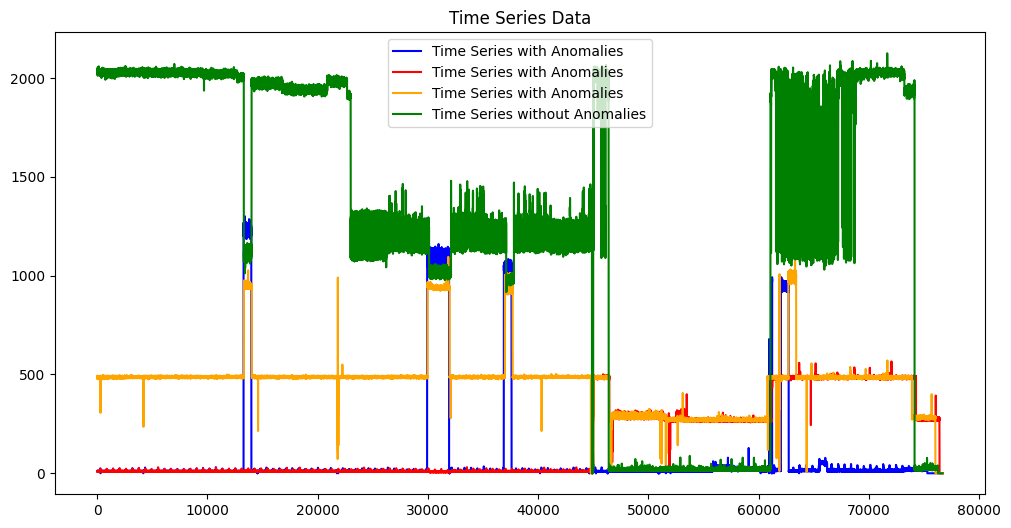

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(wide_dataframe[8642840401624200], color="blue", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8677660403123800], color="red", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8642840401612300], color="orange", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8609960468879057], color="green", label="Time Series without Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

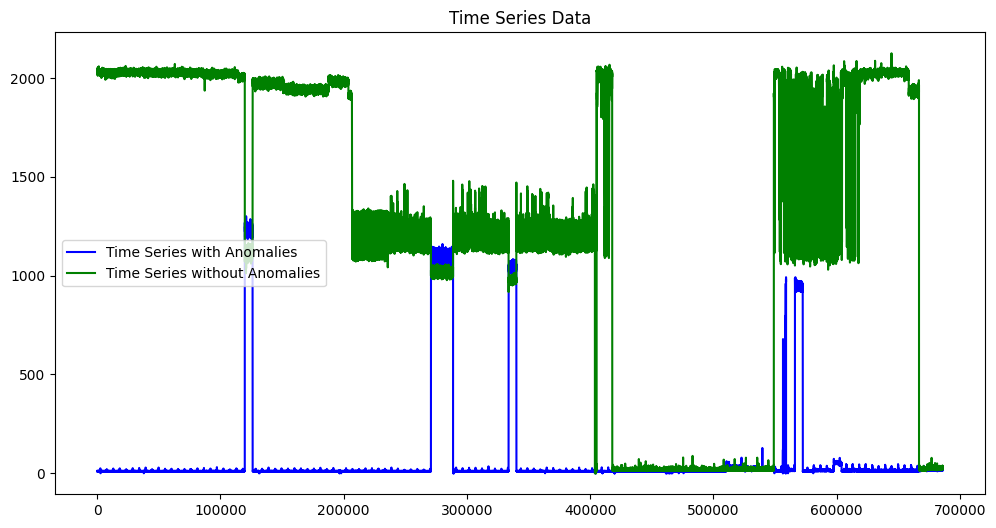

In [7]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(grouped_dataframe.get_group(8642840401624200)['ul_tx'], color="blue", label="Time Series with Anomalies")
plt.plot(grouped_dataframe.get_group(8609960468879057)['ul_tx'], color="green", label="Time Series without Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

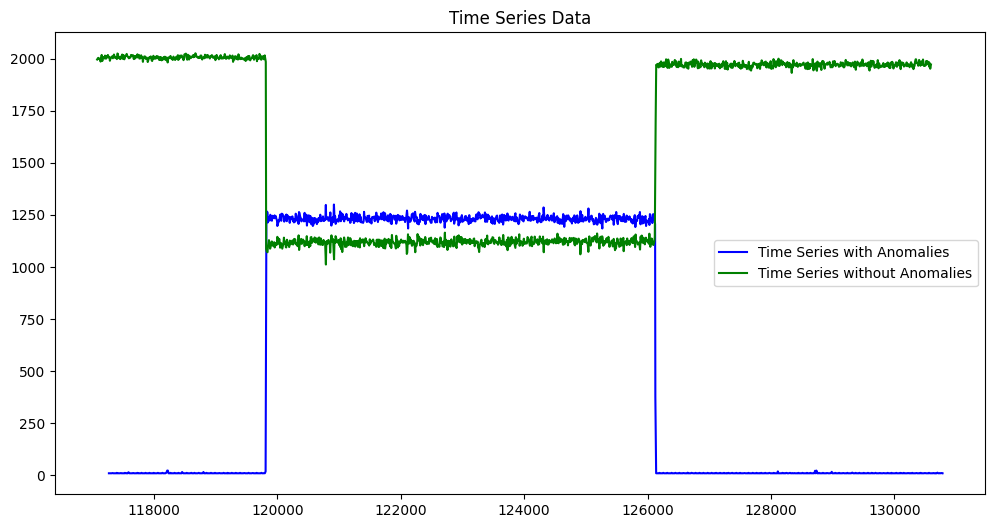

In [8]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(grouped_dataframe.get_group(8642840401624200)['ul_tx'][13000:14500], color="blue", label="Time Series with Anomalies")   # [13000:14500]    [29000:33000]  [36300:38300]
plt.plot(grouped_dataframe.get_group(8609960468879057)['ul_tx'][13000:14500], color="green", label="Time Series without Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

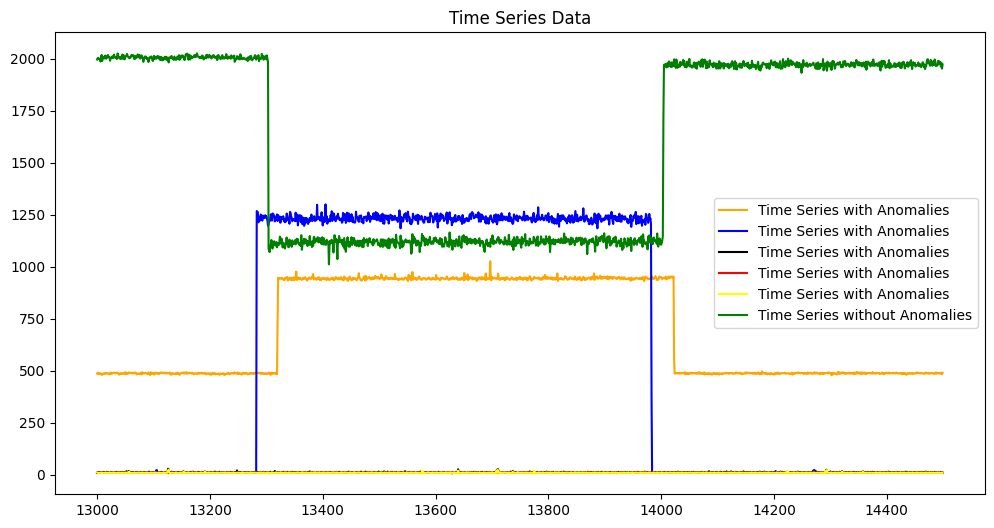

In [9]:


plt.figure(figsize=(12, 6))
plt.plot(wide_dataframe[8642840401612300][13000:14500], color="orange", label="Time Series with Anomalies")  # [13000:14500]    [29000:33000]   [61000:64000]
plt.plot(wide_dataframe[8642840401624200][13000:14500], color="blue", label="Time Series with Anomalies")    #  # [13000:14500]    [29000:33000]  [36300:38300]
plt.plot(wide_dataframe[8642840401594200][13000:14500], color="black", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8677660403123800][13000:14500], color="red", label="Time Series with Anomalies")
plt.plot(wide_dataframe[3557821101183501][13000:14500], color="yellow", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8609960468879057][13000:14500], color="green", label="Time Series without Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

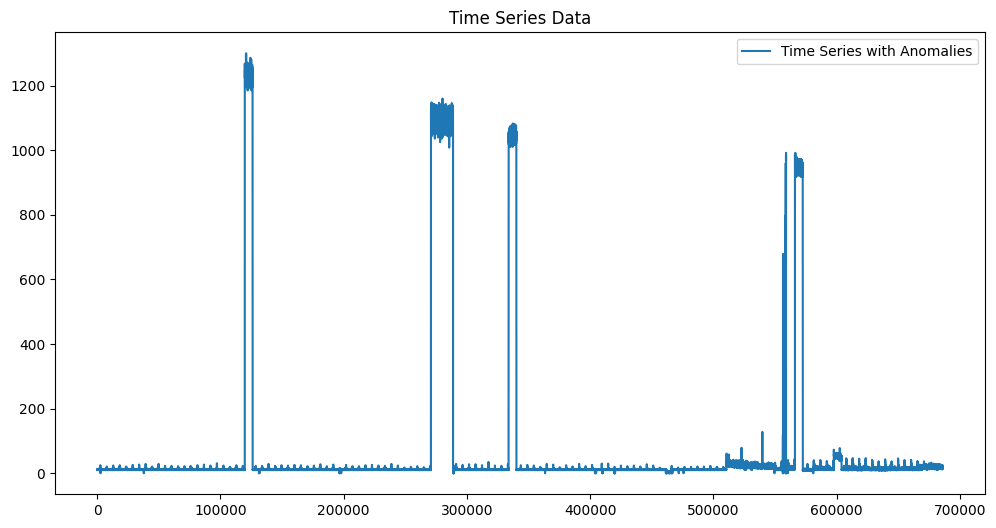

In [10]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(filtered_data2['ul_tx'], label="Time Series with Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

In [11]:
#y2 = filtered_data2['ul_tx']
#y = y2[13000:14500]

y = grouped_dataframe.get_group(8609960468879057)['ul_tx'][13000:14500]

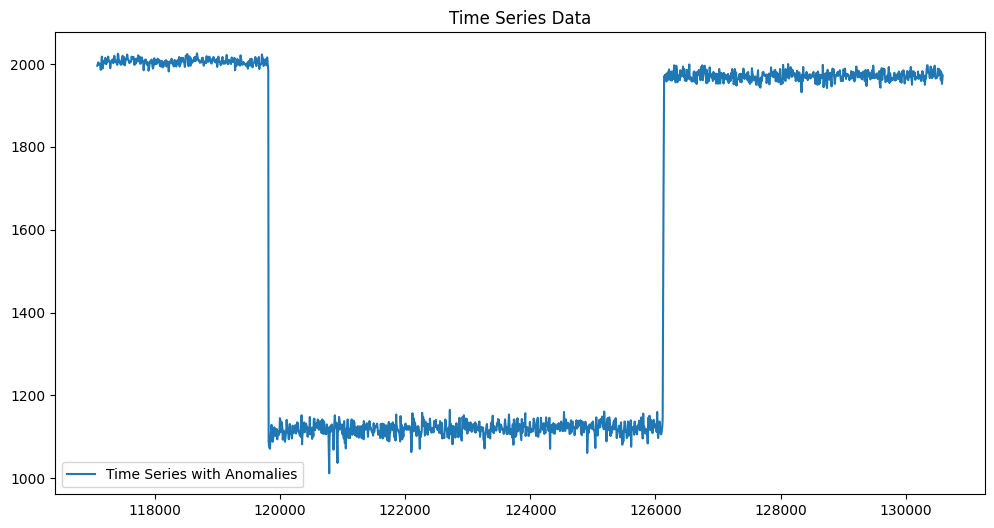

In [12]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(y, label="Time Series with Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

In [13]:
def permutation_entropy(y, order=3, delay=1):
    """
    Compute the permutation entropy of a time series.

    Parameters:
    - time_series: numpy array, the time series data
    - order: int, embedding dimension (D)
    - delay: int, embedding delay (tau)

    Returns:
    - pe: Permutation entropy value
    """
    n = len(y)
    if n < order * delay:
        raise ValueError("Time series is too short for given order and delay.")

    # Generate ordinal patterns
    ordinal_patterns = list(permutations(range(order)))
    pattern_counts = {pattern: 0 for pattern in ordinal_patterns}

    # Count occurrences of each pattern
    for i in range(n - (order - 1) * delay):
        window = y[i:(i + order * delay):delay]
        sorted_indices = tuple(np.argsort(window))
        pattern_counts[sorted_indices] += 1

    # Compute probabilities
    total_patterns = sum(pattern_counts.values())
    probabilities = [count / total_patterns for count in pattern_counts.values()]

    # Calculate permutation entropy
    pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
    return pe


In [14]:
def sliding_window_pe(y, window_size, order=3, delay=1):
    """
    Compute PE over a sliding window.

    Parameters:
    - time_series: numpy array, the time series data
    - window_size: int, size of the sliding window
    - order: int, embedding dimension
    - delay: int, embedding delay

    Returns:
    - pe_values: List of PE values for each window
    """
    pe_values = []
    for i in range(len(y) - window_size + 1):
        window = y[i:i + window_size]
        pe = permutation_entropy(window, order, delay)
        pe_values.append(pe)
    return np.array(pe_values)

# Compute PE
window_size = 50
order = 3
delay = 1

pe_values = sliding_window_pe(y, window_size, order, delay)
print(f"Computed PE values: {pe_values[:5]}")

# Compute PE
pe_series = sliding_window_pe(y, window_size, order, delay)

<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

Computed PE values: [1.75668705 1.76460404 1.76460404 1.76251722 1.76251722]


<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

In [15]:
print(pe_series)

[1.75668705 1.76460404 1.76460404 ... 1.73061006 1.73952403 1.73061006]


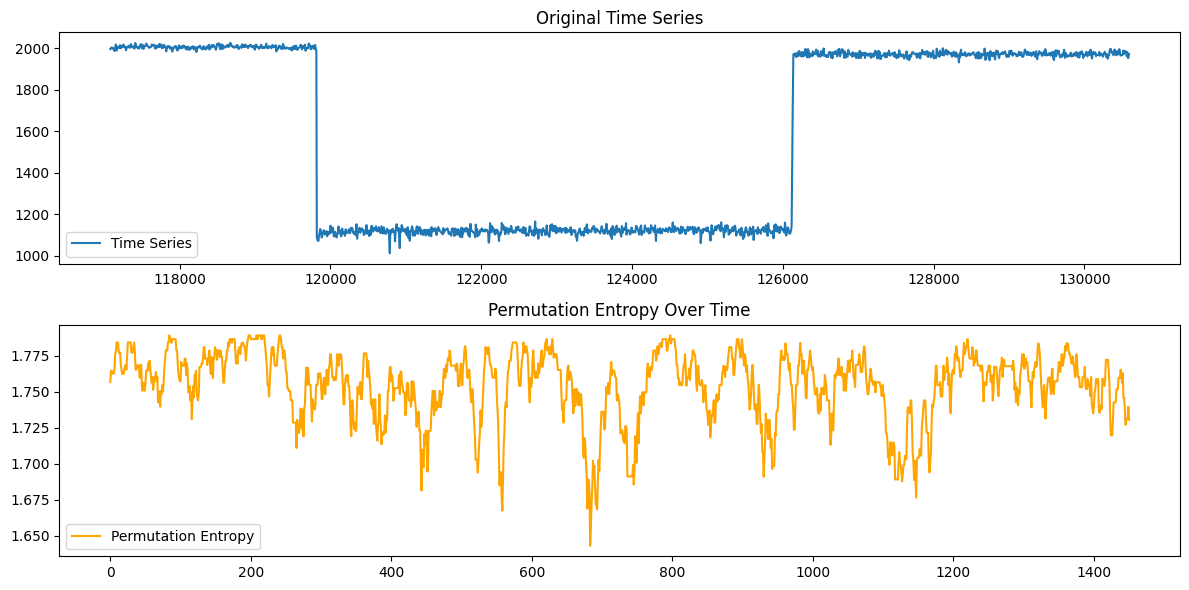

In [16]:
plt.figure(figsize=(12, 6))

# Plot the time series
plt.subplot(2, 1, 1)
plt.plot(y, label="Time Series")
plt.title("Original Time Series")
plt.legend()

# Plot the PE values
plt.subplot(2, 1, 2)
plt.plot(range(len(pe_series)), pe_series, label="Permutation Entropy", color="orange")
plt.title("Permutation Entropy Over Time")
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
index = range(13049,14500)

df_ΕΝΤ_grouped_data = pd.DataFrame(index=index)

for imeisv, group in grouped_dataframe:
    #print(f"GROUPED  DataFrame for imeisv: {imeisv}")
    #print(group)
    #print(group['ul_tx'][13000:14500])
    df_ΕΝΤ_grouped_data[imeisv] = sliding_window_pe(grouped_dataframe.get_group(imeisv)['ul_tx'][13000:14500].values, window_size, order, delay)

print(df_ΕΝΤ_grouped_data)

<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

       3557821101183501  8609960468879057  8609960480666910  8609960480859058  \
13049          0.771011          1.756687          1.646203          1.696293   
13050          0.735622          1.764604          1.646203          1.675429   
13051          0.735622          1.764604          1.646203          1.696293   
13052          0.771011          1.762517          1.646203          1.698380   
13053          0.805805          1.762517          1.600032          1.696293   
...                 ...               ...               ...               ...   
14495          0.837000          1.730610          1.644069          1.686037   
14496          0.805805          1.730610          1.644069          1.668350   
14497          0.805805          1.730610          1.644069          1.683950   
14498          0.805805          1.739524          1.644069          1.679967   
14499          0.837000          1.730610          1.644069          1.683950   

       8628490433231158  86

In [19]:
df_ΕΝΤ = pd.DataFrame(index=wide_dataframe.index[13049:14500])  # Create an empty DataFrame with the desired index
df_ΕΝΤ['ΕΝΤ_8609960468879057'] = sliding_window_pe(wide_dataframe[8609960468879057][13000:14500].values, window_size, order, delay) # Apply to the entire column, not element-wise

print(df_ΕΝΤ)

<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)


           ΕΝΤ_8609960468879057
RowNumber                      
13049                  1.756687
13050                  1.764604
13051                  1.764604
13052                  1.762517
13053                  1.762517
...                         ...
14495                  1.730610
14496                  1.730610
14497                  1.730610
14498                  1.739524
14499                  1.730610

[1451 rows x 1 columns]


In [20]:
df_ΕΝΤ = pd.DataFrame(index=wide_dataframe.index[13049:14500])  # Create an empty DataFrame with the desired index
#  13049:14500    29049:33000  61049:64000
# Apply sliding_window_pe to each column using a lambda function
for column in wide_dataframe.columns:
    df_ΕΝΤ[column] = sliding_window_pe(wide_dataframe[column][13000:14500].values, window_size, order, delay)

print(df_ΕΝΤ)

<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-13-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

           3557821101183501  8609960468879057  8609960480666910  \
RowNumber                                                         
13049              0.771011          1.756687          1.646203   
13050              0.735622          1.764604          1.646203   
13051              0.735622          1.764604          1.646203   
13052              0.771011          1.762517          1.646203   
13053              0.805805          1.762517          1.600032   
...                     ...               ...               ...   
14495              0.837000          1.730610          1.644069   
14496              0.805805          1.730610          1.644069   
14497              0.805805          1.730610          1.644069   
14498              0.805805          1.739524          1.644069   
14499              0.837000          1.730610          1.644069   

           8609960480859058  8628490433231158  8642840401594200  \
RowNumber                                                    

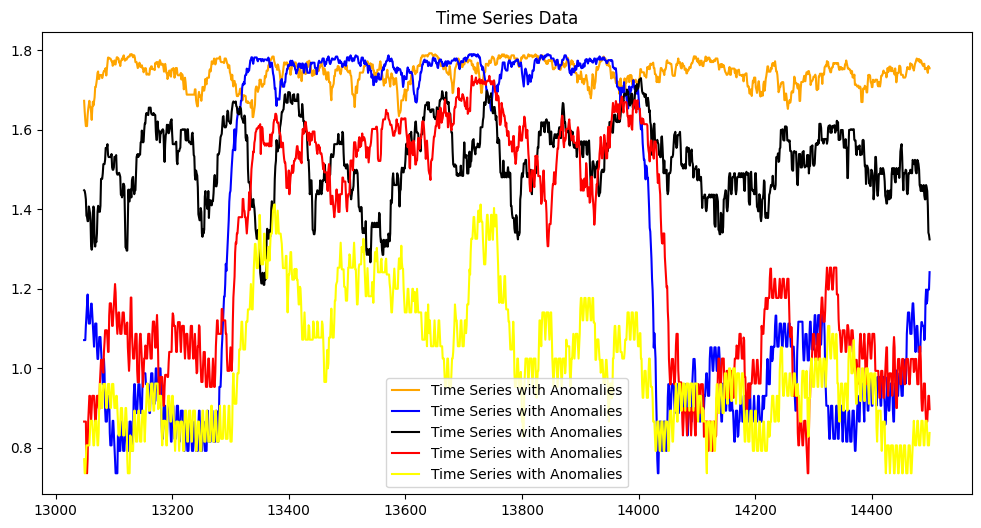

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df_ΕΝΤ_grouped_data[8642840401612300], color="orange", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ_grouped_data[8642840401624200], color="blue", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ_grouped_data[8642840401594200], color="black", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ_grouped_data[8677660403123800], color="red", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ_grouped_data[3557821101183501], color="yellow", label="Time Series with Anomalies")


plt.legend()
plt.title("Time Series Data")
plt.show()

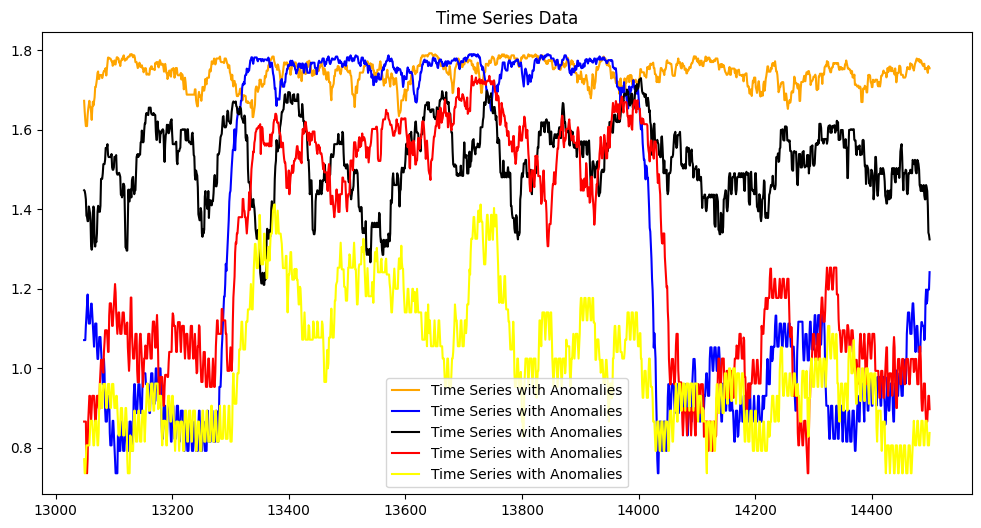

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df_ΕΝΤ[8642840401612300], color="orange", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ[8642840401624200], color="blue", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ[8642840401594200], color="black", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ[8677660403123800], color="red", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ[3557821101183501], color="yellow", label="Time Series with Anomalies")


plt.legend()
plt.title("Time Series Data")
plt.show()

<ipython-input-22-433eeb0065e3>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


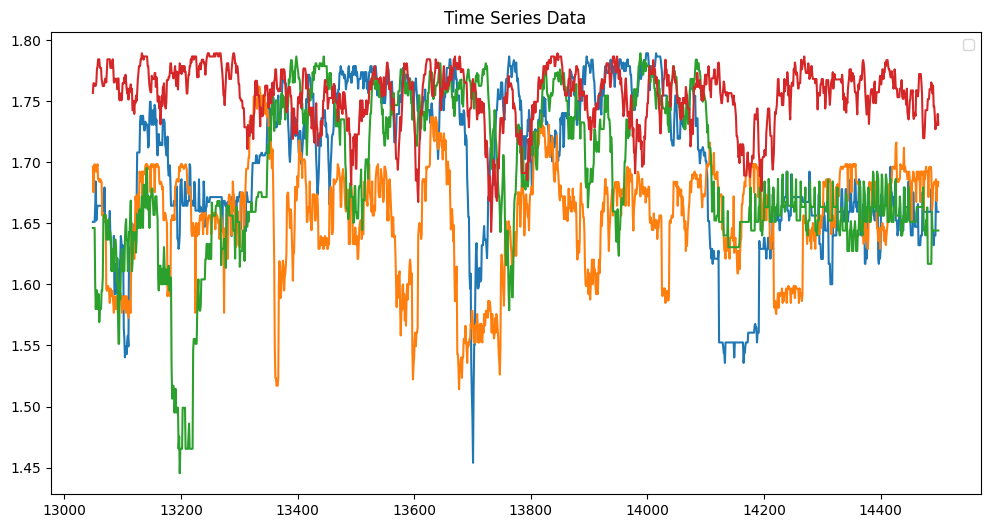

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_ΕΝΤ[8628490433231158])
plt.plot(df_ΕΝΤ[8609960480859058])
plt.plot(df_ΕΝΤ[8609960480666910])
plt.plot(df_ΕΝΤ[8609960468879057])

plt.legend()
plt.title("Time Series Data")
plt.show()

In [29]:
for imeisv, group in grouped_dataframe:
    print(f"GROUPED  DataFrame for imeisv: {imeisv}")
    print(group)
    print(group['ul_tx'][36300:38300])
    print(sliding_window_pe(group['ul_tx'][36300:38300], window_size, order=3, delay=1))

GROUPED  DataFrame for imeisv: 3557821101183501
                  imeisv  ul_tx
0       3557821101183501   10.0
12      3557821101183501   10.0
23      3557821101183501   12.0
30      3557821101183501   10.0
38      3557821101183501   10.0
...                  ...    ...
685982  3557821101183501   10.0
685990  3557821101183501   10.0
685999  3557821101183501   12.0
686010  3557821101183501   10.0
686017  3557821101183501   10.0

[76213 rows x 2 columns]
326601    10.0
326614    10.0
326620    10.0
326630    10.0
326639    11.0
          ... 
344579    10.0
344587    10.0
344596    10.0
344604    12.0
344616    10.0
Name: ul_tx, Length: 2000, dtype: float64


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

[0.92542244 0.92542244 0.99053106 ... 0.92424756 0.89305283 0.93072243]
GROUPED  DataFrame for imeisv: 8609960468879057
                  imeisv   ul_tx
4       8609960468879057  2037.0
14      8609960468879057  2038.0
19      8609960468879057  2036.0
31      8609960468879057  2043.0
39      8609960468879057  2040.0
...                  ...     ...
685984  8609960468879057    22.0
685992  8609960468879057    25.0
686002  8609960468879057    27.0
686012  8609960468879057    18.0
686021  8609960468879057    22.0

[76266 rows x 2 columns]
326606    1160.0
326611    1202.0
326619    1255.0
326629    1141.0
326641    1250.0
           ...  
344582    1210.0
344590    1238.0
344598    1135.0
344608    1251.0
344617    1161.0
Name: ul_tx, Length: 2000, dtype: float64


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

[1.67764695 1.66436618 1.68205337 ... 1.68205337 1.67764695 1.67401227]
GROUPED  DataFrame for imeisv: 8609960480666910
                  imeisv   ul_tx
8       8609960480666910  1254.0
17      8609960480666910  1306.0
26      8609960480666910  1278.0
34      8609960480666910  1272.0
43      8609960480666910  1314.0
...                  ...     ...
685986  8609960480666910   285.0
685995  8609960480666910   292.0
686007  8609960480666910   286.0
686015  8609960480666910   286.0
686024  8609960480666910   284.0

[76646 rows x 2 columns]
325509    1514.0
325520    1360.0
325527    1469.0
325536    1439.0
325547    1407.0
           ...  
343429    1416.0
343438    1455.0
343446    1520.0
343455    1380.0
343464    1619.0
Name: ul_tx, Length: 2000, dtype: float64


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

[1.66340421 1.66340421 1.68635538 ... 1.73359408 1.70356377 1.7079702 ]
GROUPED  DataFrame for imeisv: 8609960480859058
                  imeisv   ul_tx
3       8609960480859058  1719.0
9       8609960480859058  1761.0
18      8609960480859058  1714.0
27      8609960480859058  1765.0
37      8609960480859058  1718.0
...                  ...     ...
685985  8609960480859058    23.0
685993  8609960480859058    25.0
686003  8609960480859058    17.0
686008  8609960480859058    24.0
686018  8609960480859058    21.0

[76275 rows x 2 columns]
326603    1856.0
326612    1854.0
326622    1864.0
326631    1842.0
326642    1870.0
           ...  
344580    1863.0
344591    1863.0
344600    1849.0
344609    1857.0
344614    1847.0
Name: ul_tx, Length: 2000, dtype: float64


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

[1.76118446 1.75886486 1.75393426 ... 1.75166162 1.74518674 1.74518674]
GROUPED  DataFrame for imeisv: 8628490433231158
                  imeisv   ul_tx
6       8628490433231158  1265.0
16      8628490433231158  1333.0
25      8628490433231158  1252.0
33      8628490433231158  1339.0
42      8628490433231158  1264.0
...                  ...     ...
685989  8628490433231158   278.0
685998  8628490433231158   282.0
686006  8628490433231158   276.0
686014  8628490433231158   279.0
686022  8628490433231158   269.0

[76687 rows x 2 columns]
325518    1511.0
325529    1325.0
325538    1423.0
325545    1411.0
325554    1316.0
           ...  
343437    1371.0
343447    1370.0
343457    1447.0
343466    1276.0
343475    1514.0
Name: ul_tx, Length: 2000, dtype: float64


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

[1.60010934 1.60010934 1.6429372  ... 1.70843063 1.7040242  1.7040242 ]
GROUPED  DataFrame for imeisv: 8642840401594200
                  imeisv  ul_tx
2       8642840401594200   10.0
11      8642840401594200   10.0
21      8642840401594200   10.0
28      8642840401594200   14.0
40      8642840401594200   11.0
...                  ...    ...
685983  8642840401594200   13.0
685994  8642840401594200   10.0
686001  8642840401594200   12.0
686009  8642840401594200   10.0
686020  8642840401594200   13.0

[76205 rows x 2 columns]
326602    10.0
326615    10.0
326623    10.0
326633    14.0
326640    10.0
          ... 
344581    10.0
344586    14.0
344597    11.0
344606    11.0
344613    10.0
Name: ul_tx, Length: 2000, dtype: float64


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

[1.46035636 1.46035636 1.47216161 ... 1.58536213 1.58899681 1.57101668]
GROUPED  DataFrame for imeisv: 8642840401612300
                  imeisv  ul_tx
7       8642840401612300  479.0
15      8642840401612300  482.0
24      8642840401612300  488.0
35      8642840401612300  483.0
44      8642840401612300  483.0
...                  ...    ...
685988  8642840401612300  280.0
685996  8642840401612300  277.0
686005  8642840401612300  283.0
686016  8642840401612300  282.0
686023  8642840401612300  275.0

[76028 rows x 2 columns]
327688    487.0
327698    480.0
327705    485.0
327716    483.0
327723    488.0
          ...  
345601    491.0
345611    489.0
345620    490.0
345628    490.0
345638    487.0
Name: ul_tx, Length: 2000, dtype: float64


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

[1.69318799 1.69318799 1.69318799 ... 1.74952784 1.72468011 1.71908272]
GROUPED  DataFrame for imeisv: 8642840401624200
                  imeisv  ul_tx
1       8642840401624200   10.0
10      8642840401624200   10.0
22      8642840401624200   12.0
32      8642840401624200   10.0
36      8642840401624200   10.0
...                  ...    ...
685981  8642840401624200   18.0
685991  8642840401624200   19.0
686000  8642840401624200   18.0
686011  8642840401624200   18.0
686019  8642840401624200   20.0

[75304 rows x 2 columns]
328602    10.0
328614    12.0
328621    10.0
328632    10.0
328643    10.0
          ... 
346578    10.0
346586    10.0
346597    10.0
346603    10.0
346612    11.0
Name: ul_tx, Length: 2000, dtype: float64


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

[0.93035826 0.89680854 0.86561381 ... 0.77101122 0.73562194 0.73562194]
GROUPED  DataFrame for imeisv: 8677660403123800
                  imeisv  ul_tx
5       8677660403123800   10.0
13      8677660403123800   10.0
20      8677660403123800   10.0
29      8677660403123800   10.0
41      8677660403123800   10.0
...                  ...    ...
685987  8677660403123800  269.0
685997  8677660403123800  276.0
686004  8677660403123800  278.0
686013  8677660403123800  271.0
686025  8677660403123800  265.0

[76402 rows x 2 columns]
326605    12.0
326613    10.0
326621    10.0
326628    10.0
326638    10.0
          ... 
344577    10.0
344588    10.0
344599    10.0
344605    10.0
344615    10.0
Name: ul_tx, Length: 2000, dtype: float64


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

[0.82733137 0.79194209 0.79194209 ... 1.05230547 1.05230547 1.02306545]


<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(g

In [21]:
def sliding_window_pe_grouped(df, group_col, value_col, window_size=50, order=3, delay=1):
    """
    Compute permutation entropy over a sliding window for each group in a DataFrame.

    Parameters:
    - df: pandas DataFrame with a group column and a time series value column
    - group_col: str, column name containing group identifiers
    - value_col: str, column name containing the time series values
    - window_size: int, size of the sliding window
    - order: int, embedding dimension
    - delay: int, embedding delay

    Returns:
    - df_pe: DataFrame with group identifiers, time indices, and PE values
    """
    results = []

    for group, data in df.groupby(group_col):
        time_series = data[value_col][36300:38300].values
        indices = data.index.values

        # Compute PE over sliding windows
        pe_values = [permutation_entropy(time_series[i:i + window_size], order, delay)
                     for i in range(len(time_series) - window_size + 1)]

        # Store results
        result_df = pd.DataFrame({
            group_col: [group] * len(pe_values),
            "Index": indices[:len(pe_values)],  # Align indices
            "PE_Value": pe_values
        })
        results.append(result_df)

    # Concatenate results into a single DataFrame
    df_pe = pd.concat(results, ignore_index=True)
    return df_pe


In [19]:
df = dataframe

In [25]:
# Apply sliding window permutation entropy for each group
window_size = 50
df_pe = sliding_window_pe_grouped(df, group_col="imeisv", value_col="ul_tx", window_size=window_size)

# Display first few results
print(df_pe)

<ipython-input-10-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)


                 imeisv  Index  PE_Value
0      3557821101183501      0  0.925422
1      3557821101183501     12  0.925422
2      3557821101183501     23  0.990531
3      3557821101183501     30  1.024081
4      3557821101183501     38  1.024081
...                 ...    ...       ...
17554  8677660403123800  17509  1.052305
17555  8677660403123800  17517  1.052305
17556  8677660403123800  17528  1.052305
17557  8677660403123800  17537  1.052305
17558  8677660403123800  17544  1.023065

[17559 rows x 3 columns]


In [ ]:


#/content/drive/MyDrive/CSV.xlsx


import pandas as pd

# Path to the CSV file
file_path = '/content/drive/MyDrive/CSV.xlsx'



# Read the file
df = pd.read_excel(file_path)

# Display the first few rows
print(df.head())


                     _time            imeisv     5g_tmsi  amf_ue_id  \
0  2024-08-17 12:00:01.700  3557820000000000   379786680        106   
1  2024-08-17 12:00:01.700  8642840000000000  2380574316        436   
2  2024-08-17 12:00:01.700  8642840000000000  1855572917        109   
3  2024-08-17 12:00:01.700  8609960000000000  3832369782        108   
4  2024-08-17 12:00:01.700  8609960000000000  1034619961        468   

  bearer_0_apn  bearer_0_dl_total_bytes   bearer_0_ip      bearer_0_ipv6  \
0          ims                  4832474   192.168.4.6  2001:468:3000:2::   
1          ims                  4821610   192.168.4.2  2001:468:3000:1::   
2          ims                  4775173  192.168.4.14  2001:468:3000:4::   
3          ims                  4767199  192.168.4.10  2001:468:3000:3::   
4     internet                469463419   10.20.10.20                NaN   

   bearer_0_pdu_session_id  bearer_0_qos_flow_id  ...  pusch_snr   ri  \
0                        1                 